In [4]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [10]:
import numpy as np

# Data vectorization function
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# I can also do OHE with the built-in Keras function to_categorical
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
# Extract validation set from the training set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
# Build the network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 161us/step - loss: 2.4995 - acc: 0.4897 - val_loss: 1.6817 - val_acc: 0.6460
Epoch 2/20
7982/7982 [==============================] - 1s 102us/step - loss: 1.3914 - acc: 0.7041 - val_loss: 1.2780 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.0477 - acc: 0.7700 - val_loss: 1.1174 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.8241 - acc: 0.8281 - val_loss: 1.0219 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 1s 108us/step - loss: 0.6597 - acc: 0.8637 - val_loss: 0.9704 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.5252 - acc: 0.8939 - val_loss: 0.9205 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 101us/step - loss: 0.4288 - acc: 0.9113 - val_loss: 0.9099 - val_acc: 0.8040
E

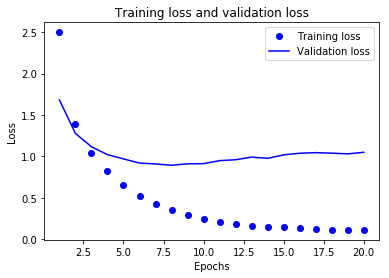

In [18]:
# Plot training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

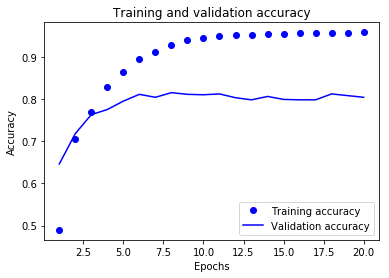

In [19]:
# Plot training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
# Because the model overfits after 9 epochs, we retrain with 9 epochs
# and evaluate it on the test set

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results1 = model.evaluate(x_test, one_hot_test_labels)
print(results1)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.0834 - acc: 0.9590 - val_loss: 1.3007 - val_acc: 0.7960
Epoch 2/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.0836 - acc: 0.9569 - val_loss: 1.2451 - val_acc: 0.7980
Epoch 3/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.0882 - acc: 0.9575 - val_loss: 1.2904 - val_acc: 0.8010
Epoch 4/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.0826 - acc: 0.9594 - val_loss: 1.3202 - val_acc: 0.7930
Epoch 5/9
7982/7982 [==============================] - 1s 114us/step - loss: 0.0852 - acc: 0.9577 - val_loss: 1.3097 - val_acc: 0.7840
Epoch 6/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.0793 - acc: 0.9607 - val_loss: 1.3887 - val_acc: 0.7830
Epoch 7/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.0852 - acc: 0.9580 - val_loss: 1.3048 - val_acc: 0.7930
Epoch 8

In [25]:
predictions = model.predict(x_test)

In [26]:
predictions[0].shape

(46,)

In [27]:
np.sum(predictions[0])

1.0

In [28]:
np.argmax(predictions[0])

3